In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
train = pd.read_csv("data/train.csv")

# 재향벗

In [151]:
df = pd.DataFrame({'Master':[], 'Mr':[], 'Miss':[], 'Mrs':[]})

a = []
for i in ['Master', 'Mr', 'Miss', 'Mrs']:
    x = train[train['Survived']==0]['Name'].str.contains(i)
    a.append(x.sum())
df.loc[0] = a
    

b = []
for i in ['Master', 'Mr', 'Miss', 'Mrs']:
    x = train[train['Survived']==1]['Name'].str.contains(i)
    b.append(x.sum())
df.loc[1] = b

In [152]:
df

,Master,Mr,Miss,Mrs
0,17.0,463.0,55.0,27.0
1,23.0,184.0,127.0,102.0


In [162]:
c = np.array([a,b])

In [191]:
d = pd.DataFrame(np.transpose(c))

In [192]:
d

,0,1
0,17,23
1,463,184
2,55,127
3,27,102


In [202]:
d = d.rename(index={0:'Master', 1:'Mr', 2:'Miss', 3:'Mrs'})

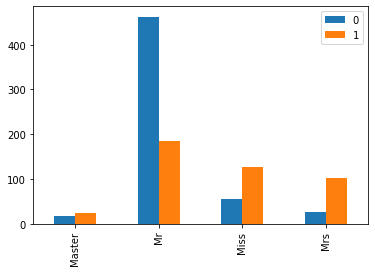

In [203]:
d.plot.bar()

# 윤서벗

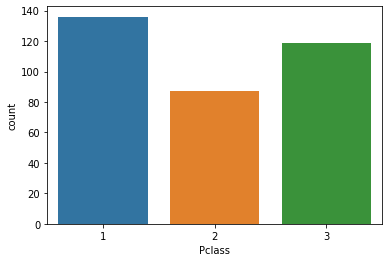

In [123]:
sns.countplot(data = train, x = train[train['Survived']==1]['Pclass'])

# 지연벗

In [224]:
s = train[train['Survived']==0]['SibSp'].value_counts()

In [221]:
d = train[train['Survived']==1]['SibSp'].value_counts()

In [246]:
frame = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8])

In [249]:
frame.loc[0] = s
frame.loc[1] = d

In [250]:
frame

,0,1,2,3,4,5,6,7,8
0,398.0,97.0,15.0,12.0,15.0,5.0,NaN,NaN,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN,NaN,NaN


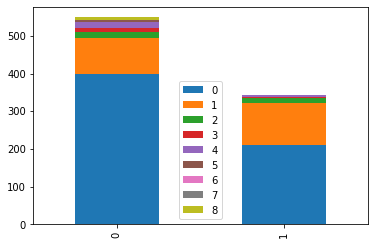

In [252]:
frame.plot.bar(stacked = True)

# 혜원벗

In [136]:
df = pd.DataFrame({'0~10':[], '10~20':[], '20~30':[], '30~40':[], '40~50':[], '50~':[]})


a = []
for i in [0,10,20,30,40]:
    a.append(train[(train['Age']>=i) & (train['Age']<i+10) & (train['Survived']==0)]['PassengerId'].count())
a.append(train[(train['Age']>=50) & (train['Survived']==0)]['PassengerId'].count())
df.loc[0] = a

a = []
for i in [0,10,20,30,40]:
    a.append(train[(train['Age']>=i) & (train['Age']<i+10) & (train['Survived']==1)]['PassengerId'].count())
a.append(train[(train['Age']>=50) & (train['Survived']==1)]['PassengerId'].count())


print(a)
df.loc[1] = a
df

[38, 41, 77, 73, 34, 27]


,0~10,10~20,20~30,30~40,40~50,50~
0,24.0,61.0,143.0,94.0,55.0,47.0
1,38.0,41.0,77.0,73.0,34.0,27.0


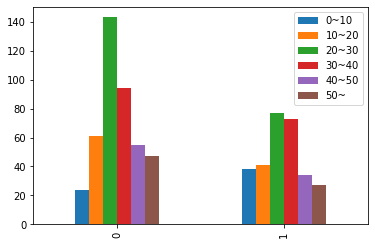

In [137]:
df.plot.bar()

# 희준벗

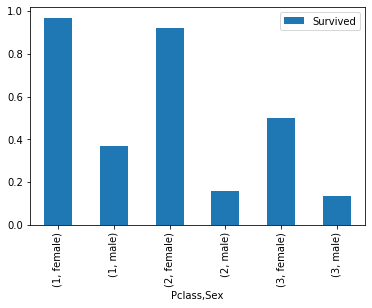

In [141]:
train[['Pclass','Survived','Sex']].groupby(['Pclass','Sex']).mean().plot.bar()